각 품목별 무역수지와 공급량의 관계

<ipython-input-2-7cba636acf10>:23: UserWarning: Glyph 47924 (\N{HANGUL SYLLABLE MU}) missing from current font.
  plt.tight_layout()
<ipython-input-2-7cba636acf10>:23: UserWarning: Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from current font.
  plt.tight_layout()
<ipython-input-2-7cba636acf10>:23: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  plt.tight_layout()
<ipython-input-2-7cba636acf10>:23: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47924 (\N{HANGUL SYLLABLE MU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarnin

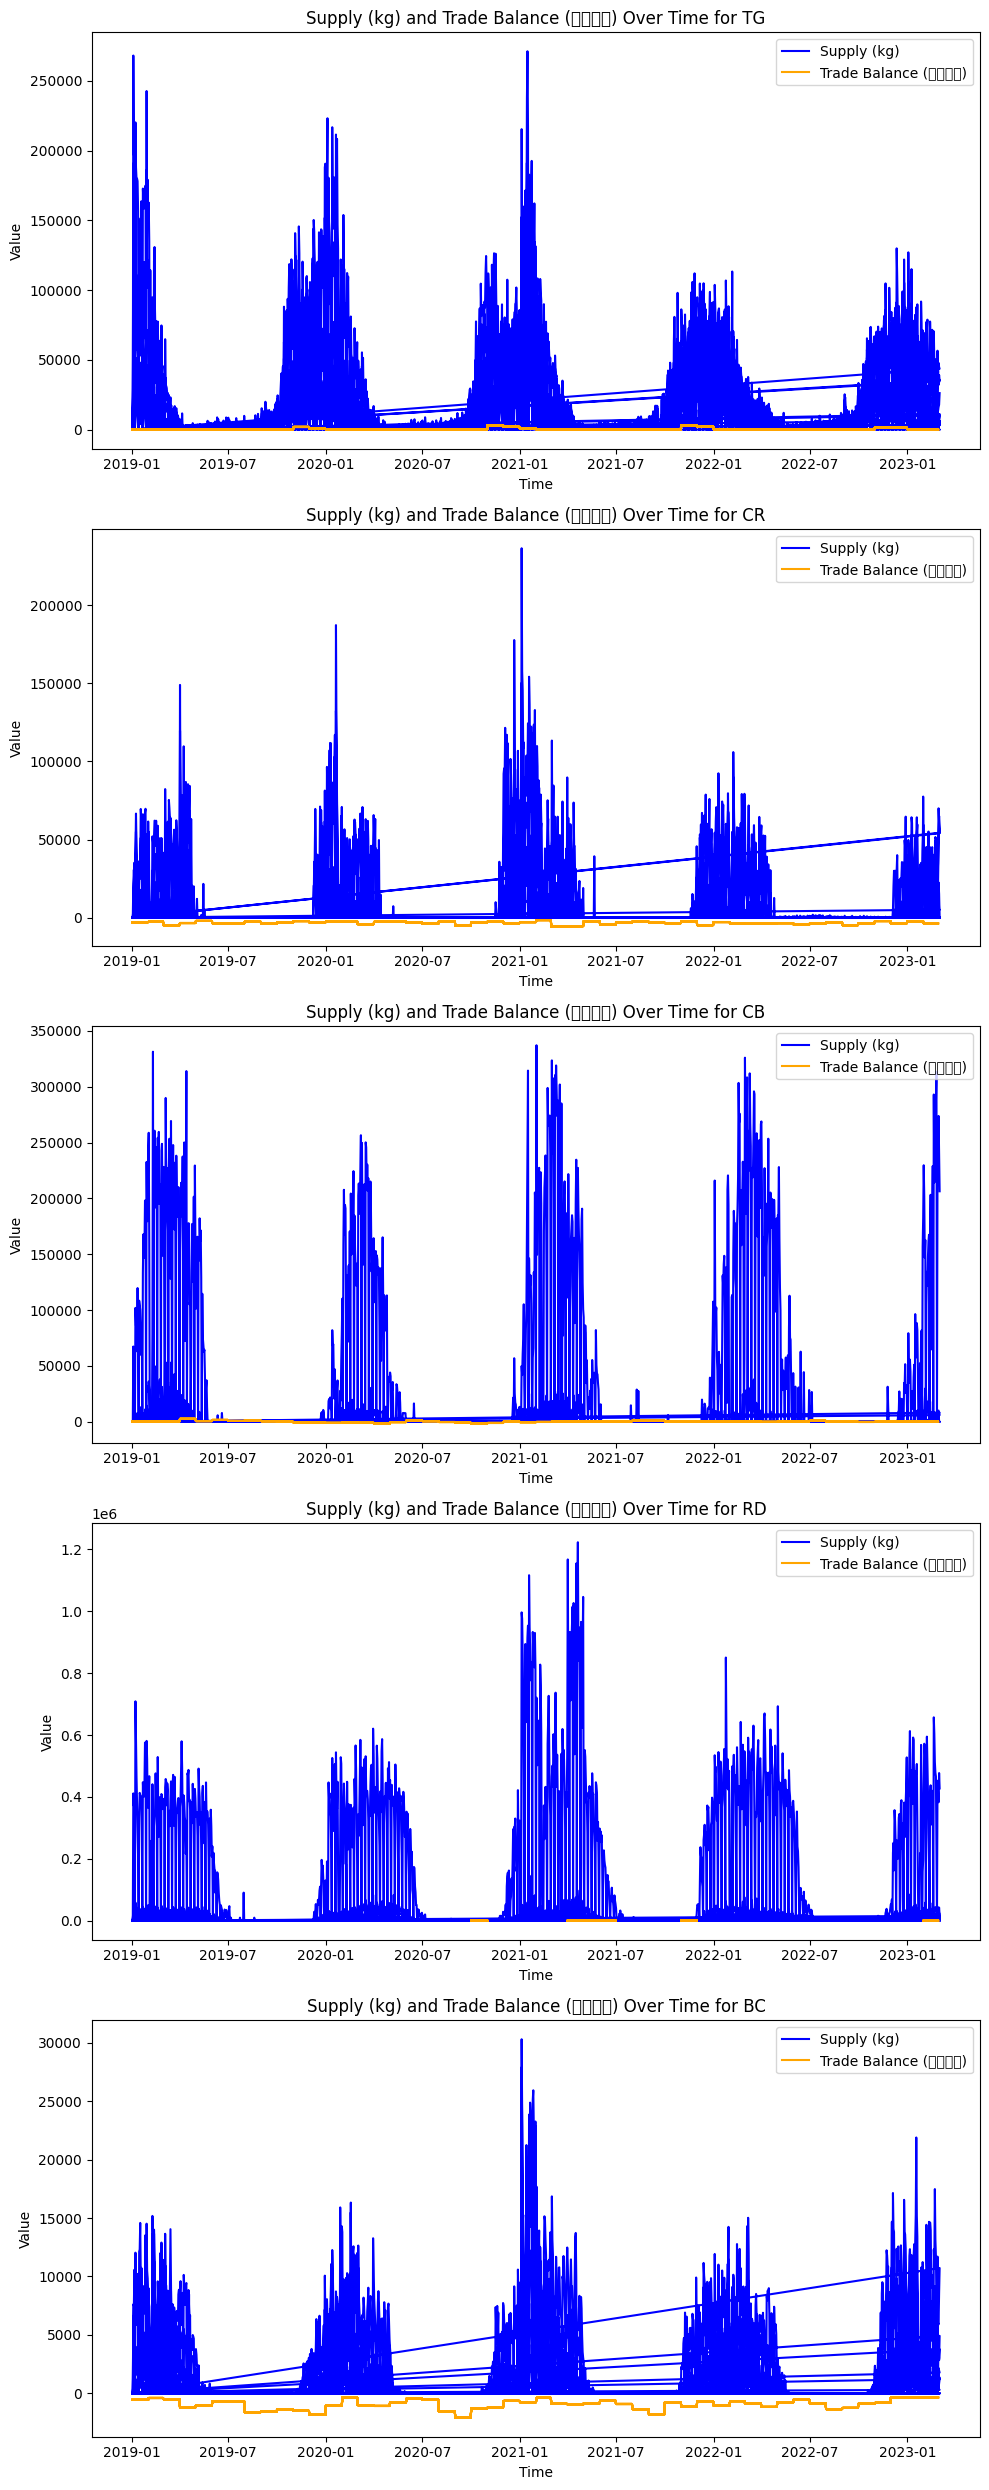

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Re-loading the dataset as a new file was uploaded
trade_data = pd.read_csv('/content/merged_train_trade_data.csv')
trade_data['timestamp'] = pd.to_datetime(trade_data['timestamp'])

# Plotting the supply(kg) and trade balance (무역수지) over time for each item
unique_items = trade_data['item'].unique()

# Preparing the plot
plt.figure(figsize=(10, 5 * len(unique_items)))

for i, item in enumerate(unique_items, 1):
    plt.subplot(len(unique_items), 1, i)
    item_data = trade_data[trade_data['item'] == item]
    plt.plot(item_data['timestamp'], item_data['supply(kg)'], label='Supply (kg)', color='blue')
    plt.plot(item_data['timestamp'], item_data['무역수지'], label='Trade Balance (무역수지)', color='orange')
    plt.title(f'Supply (kg) and Trade Balance (무역수지) Over Time for {item}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.tight_layout()

plt.show()

결론: 감귤을 제외한 나머지 품목에선 관계성을 파악하기 힘들뿐더러 무역수지가 0이거나 마이너스이다.

각 품목별 무역수지와 가격의 관계

<ipython-input-4-36e6b090c2ca>:16: UserWarning: Glyph 47924 (\N{HANGUL SYLLABLE MU}) missing from current font.
  plt.tight_layout()
<ipython-input-4-36e6b090c2ca>:16: UserWarning: Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from current font.
  plt.tight_layout()
<ipython-input-4-36e6b090c2ca>:16: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  plt.tight_layout()
<ipython-input-4-36e6b090c2ca>:16: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  plt.tight_layout()
<ipython-input-4-36e6b090c2ca>:16: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  plt.tight_layout()


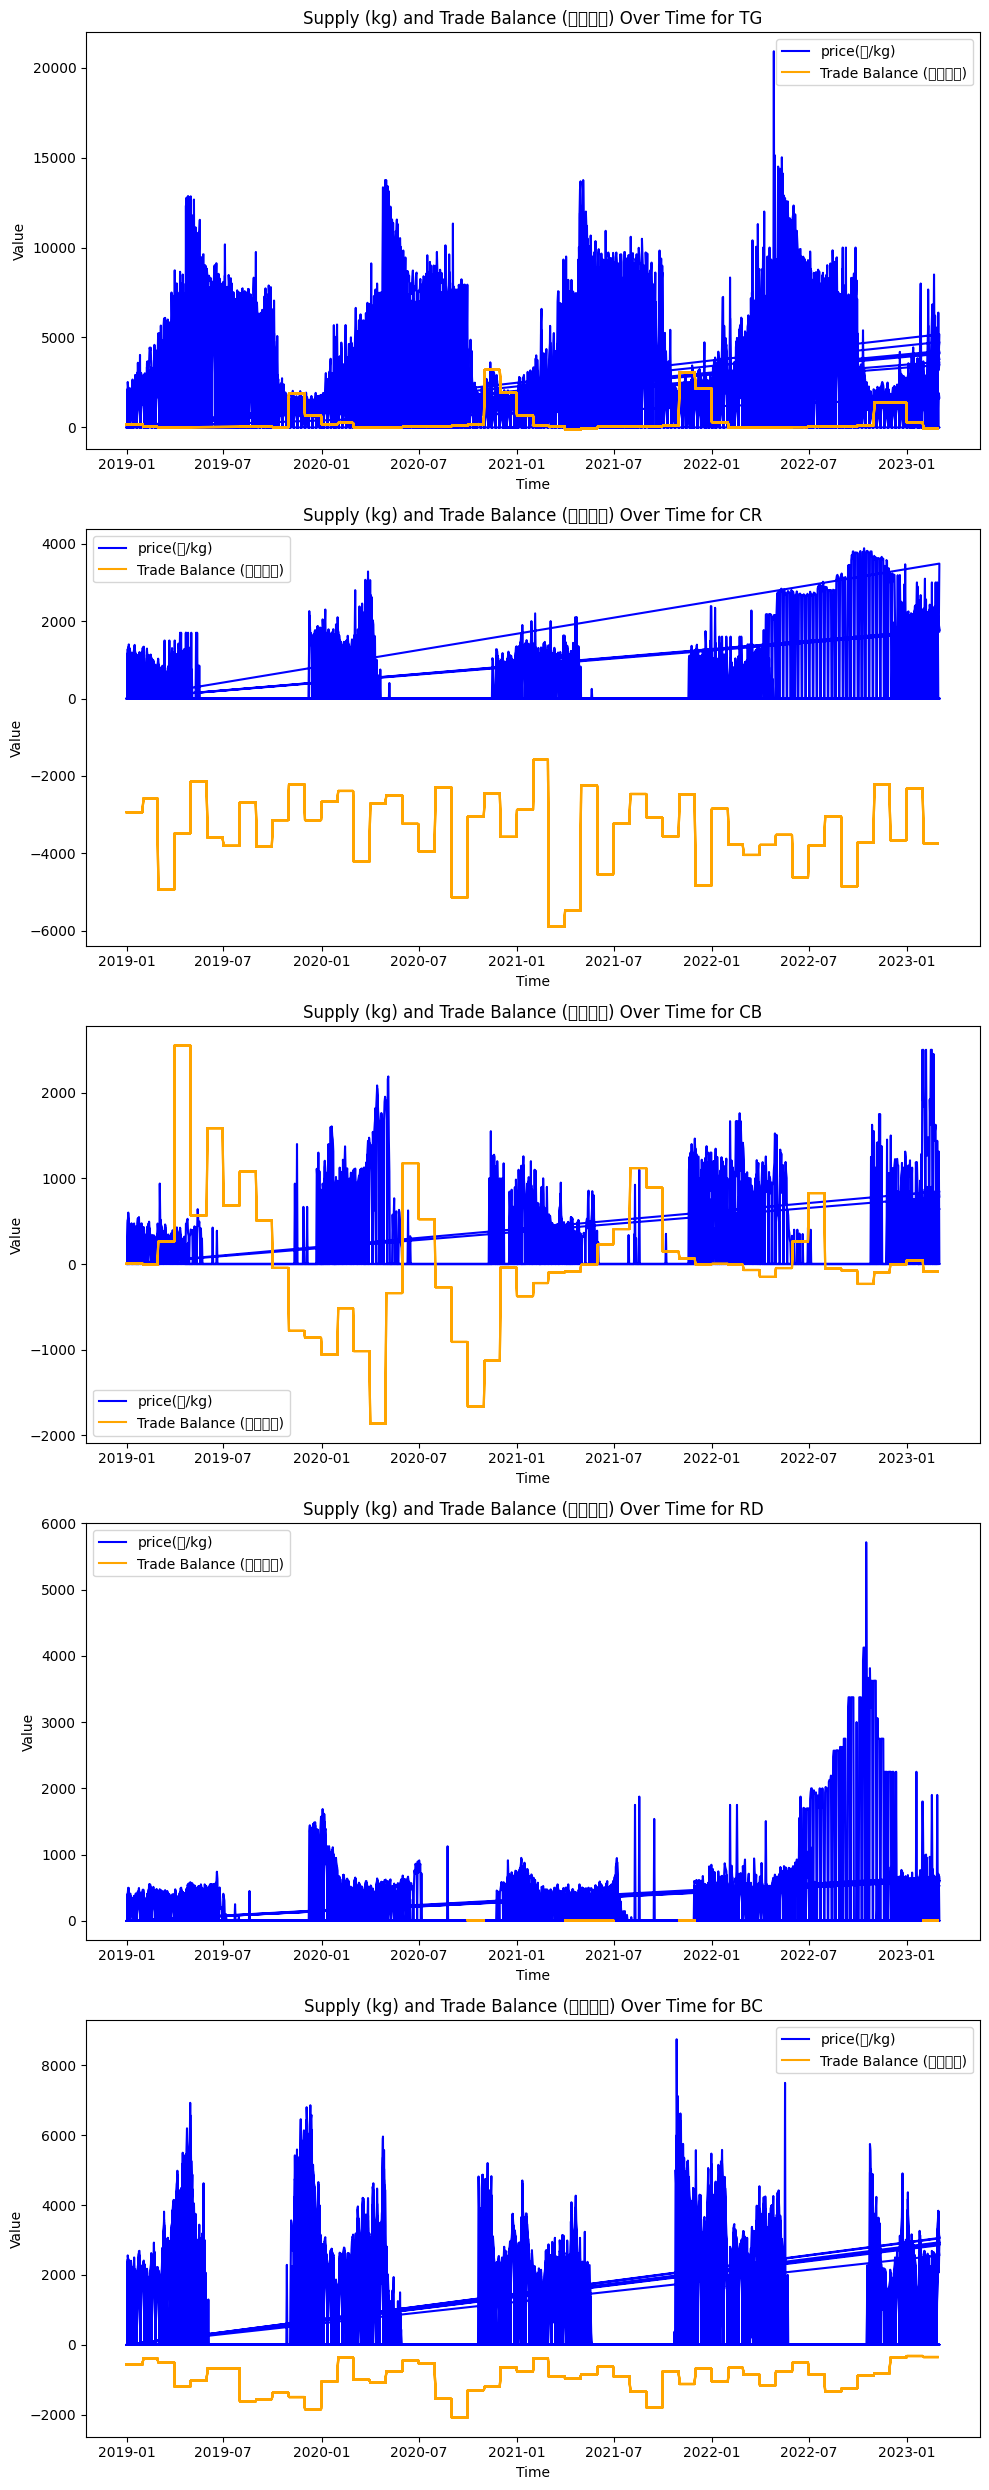

In [ ]:
# Plotting the supply(kg) and trade balance (무역수지) over time for each item
unique_items = trade_data['item'].unique()

# Preparing the plot
plt.figure(figsize=(10, 5 * len(unique_items)))

for i, item in enumerate(unique_items, 1):
    plt.subplot(len(unique_items), 1, i)
    item_data = trade_data[trade_data['item'] == item]
    plt.plot(item_data['timestamp'], item_data['price(원/kg)'], label='price(원/kg)', color='blue')
    plt.plot(item_data['timestamp'], item_data['무역수지'], label='Trade Balance (무역수지)', color='orange')
    plt.title(f'Supply (kg) and Trade Balance (무역수지) Over Time for {item}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.tight_layout()

plt.show()

데이터 분석 결과

각 품목별 유통량과 무역수지 관계를 시계열로 확인해본 결과 귤을 제외한 나머지 품목은 유통량과 관계없이 무역수지가 0이거나 적자를 기록했다. 유일하게 귤만이 유통량이 많을때 흑자를 기록했다.

각 품목별 가격과 무역수지 관계를 시계열로 확인해본 결과 귤은 무역수지가 흑자를 낸 달 뒤에 가격이 크게 오르는 것을 볼 수 있었다. 그러나 다른 품목들은 무역수지와 가격간의 관계성을 파악하기 어려웠다.

따라서 귤은 유통량, 가격과 무역수지간의 관계가 보였지만 다른 특산물은 찾기 어려웠다. 귤의 무역수지는 가격과 관계가 있어보이지만 나머지 특산물들은 관계파악이 어렵다.

추론할 수 있는 점은 귤을 제외한 다른 제주도 특산물의 유통량은 국내에서의 유통량이라고 볼 수 있다. 그렇다면 귤 가격 예측 모델을 따로 만들어서 귤 가격을 예측한다면 좋은 예측 성능을 기대해 볼 수 있다는 생각이 들었다.
귤이 상대적으로 다른 특산물에 비해 가격이 높기 때문에 귤 예측 가격과 실제 가격의 편차가 RMSE 점수에 크게 영향을 미칠 수 있기에 귤만을 위한 모델을 따로 만드면 어떨지 생각이 듦.